# Creating Visualizations

With this project, we wanted to make recommendations about creating movies to a company looking to create a new movie studio. We wanted to pose basic questions about the most popular movies. To do this, we grabbed the top 10,000 most popular movies within the last decade (2010-2019) from IMDB's database and their respective budgets and revenues from TMDB.

To find what kind of content does best at the box office, we compared several variables versus revenue and popularity. These visualizations helped us interpret our data so that we could provide key characteristics for the company to target when creating their movies.

First, import necessary packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Set all dataframes to display numbers in a human readable way. 

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Create DataFrame

Read our movie data into a dataframe.

In [13]:
df = pd.read_csv('movie_data.csv')

In [14]:
df.head()

,Unnamed: 0,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,0,tt6751668,Parasite,R,132 min,"Comedy, Drama, Thriller",8.60,201055038.00,11363000.00
1,1,tt8946378,Knives Out,PG-13,131 min,"Comedy, Crime, Drama",8.00,163700000.00,40000000.00
2,2,tt2584384,Jojo Rabbit,PG-13,108 min,"Comedy, Drama, War",8.00,82468705.00,14000000.00
3,3,tt8579674,1917,R,119 min,"Drama, War",8.40,200483309.00,100000000.00
4,4,tt8367814,The Gentlemen,R,113 min,"Action, Comedy, Crime",8.10,48441089.00,18400000.00


### Clean Data

Before we begin to analyze, we need to clean our data. To start off, let's get rid of the extra axis we pulled in from the CSV.

In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,tt6751668,Parasite,R,132 min,"Comedy, Drama, Thriller",8.60,201055038.00,11363000.00
1,tt8946378,Knives Out,PG-13,131 min,"Comedy, Crime, Drama",8.00,163700000.00,40000000.00
2,tt2584384,Jojo Rabbit,PG-13,108 min,"Comedy, Drama, War",8.00,82468705.00,14000000.00
3,tt8579674,1917,R,119 min,"Drama, War",8.40,200483309.00,100000000.00
4,tt8367814,The Gentlemen,R,113 min,"Action, Comedy, Crime",8.10,48441089.00,18400000.00


Everything in the `mpaa_rating` column should be a string, so let's replace all NULL values with `"Not Rated"`.

In [16]:
#turn mpaa rating NAs into string "Not Rated"
df['mpaa_rating'].fillna("Not Rated", inplace=True)

We want runtime to represent the length of every movie in minutes, but we'll need to use this as a number. To do this we remove all NULL values, turn the values into a string, remove the tailing `"min"`, and turn all values into integers.

In [17]:
#turn runtime from strings into integers
df['runtime'].fillna(0, inplace = True)
df['runtime'] = df['runtime'].astype(str)
df['runtime'] = df['runtime'].apply(lambda x: x.rstrip(' min'))
df['runtime'] = df['runtime'].astype(int)

Everything in the `genre` column should be a string, so let's replace all NULL values with `"No Genre"`.

In [18]:
#turn genre NAs into string "No Genre"
df['genre'].fillna("No Genre", inplace=True)

### How much is spent on creating a movie on average?

To visualize this, we will create a boxplot of our budget data. This currently includes `0` and NULL values. To fix this, we will replace all NULL values with a `0` and then drop all zero values. To not affect our data, we will store this in a new DataFrame `df_short`.

In [19]:
#turn gross_revenue and budget NAs into 0
df['gross_revenue'].fillna(0, inplace=True)
df['budget'].fillna(0, inplace=True)
#remove everything from dataframe without a reported revenue or budget
df_short = df[df['gross_revenue'] != 0]
df_short = df_short[df_short['budget'] != 0]

In [20]:
df_short.head()

,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,tt6751668,Parasite,R,132,"Comedy, Drama, Thriller",8.60,201055038.00,11363000.00
1,tt8946378,Knives Out,PG-13,131,"Comedy, Crime, Drama",8.00,163700000.00,40000000.00
2,tt2584384,Jojo Rabbit,PG-13,108,"Comedy, Drama, War",8.00,82468705.00,14000000.00
3,tt8579674,1917,R,119,"Drama, War",8.40,200483309.00,100000000.00
4,tt8367814,The Gentlemen,R,113,"Action, Comedy, Crime",8.10,48441089.00,18400000.00


Looking through our data, we also noticed we have a few outliers which make the boxplot difficult to read. To get rid of these, we looked at a specific range of budget values to plot. We make a DataFrame called `cleaned_budget` which removes any values outside of this range.

The range we used was less than twice the median value, and more than a quarter of the median value.

In [24]:
#remove everything from dataframe which falls out of our range
cleaned_budget = df_short[(df_short['budget'] <= df_short['budget'].median()*2)]
cleaned_budget = cleaned_budget[(cleaned_budget['budget'] >= cleaned_budget['budget'].median()*.25)]
cleaned_budget.head()

,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,tt6751668,Parasite,R,132,"Comedy, Drama, Thriller",8.60,201055038.00,11363000.00
1,tt8946378,Knives Out,PG-13,131,"Comedy, Crime, Drama",8.00,163700000.00,40000000.00
2,tt2584384,Jojo Rabbit,PG-13,108,"Comedy, Drama, War",8.00,82468705.00,14000000.00
4,tt8367814,The Gentlemen,R,113,"Action, Comedy, Crime",8.10,48441089.00,18400000.00
11,tt6394270,Bombshell,R,109,"Biography, Drama",6.80,53774397.00,32000000.00


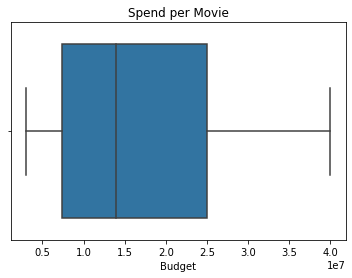

In [25]:
#budget box plot
fig, ax = plt.subplots()

sns.boxplot(x=cleaned_budget['budget'], )

ax.set_xlabel('Budget')
ax.set_title('Spend per Movie')

plt.show()

Figure 1. Spend per Movie

### Does budget affect revenue?

Let's look at whether there is a correlation between budget and revenue by plotting both onto a scatterplot with a regression line. As we will need all `0` and NULL values to be removed, we will use the `df_short` DataFrame.

Text(0.5, 0, 'Budget')

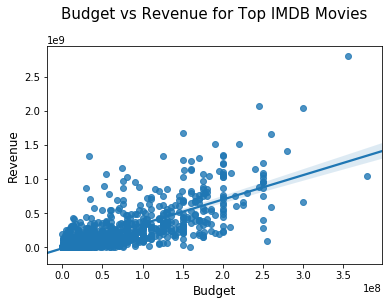

In [26]:
#budget vs revenue scatterplot
fig, ax = plt.subplots()
sns.regplot(df_short['budget'], df_short['gross_revenue'])
ax.set_title('Budget vs Revenue for Top IMDB Movies', fontsize=(15), y=1.1)
ax.set_ylabel('Revenue', fontsize=(12))
ax.set_xlabel('Budget', fontsize=(12))

Figure 2. Budget vs Revenue for Top IMDB Movie

### Which genres generate the most revenue?

An easy way to categorize our movies is by data. Let's divide our data into these categories and see which one grosses the most at the box office.

Currently, all of our movies have a list of genres for their genre value. We will need a new DataFrame which collects information for movies per genre instead of per movie. To start, let's count how many movies fit into each genre.

Again, we will need all `0` and NULL values to be removed, so we use the `df_short` DataFrame.

In [27]:
#how many movies belonged to which genre
genre_list = []
for genres in df_short['genre']:
    genre_list.extend(genre.strip() for genre in genres.split(','))
    genre_dict = {}
    for genre in genre_list:
        if genre in genre_dict:
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1

print(genre_dict)

{'Comedy': 693, 'Drama': 1111, 'Thriller': 372, 'Crime': 333, 'War': 33, 'Action': 662, 'Biography': 178, 'Adventure': 460, 'History': 88, 'Horror': 224, 'Mystery': 180, 'Animation': 144, 'Romance': 286, 'Fantasy': 173, 'Sci-Fi': 165, 'Music': 54, 'Family': 107, 'Western': 10, 'Musical': 13, 'Sport': 34}


Now, we create a new DataFrame with our individual genres and a count of how many movies fall into them.

In [32]:
genre_df_dict = {'genre': list(genre_dict.keys()), 'count': list(genre_dict.values())}
genre_df = pd.DataFrame(genre_df_dict)
genre_df

,genre,count
0,Comedy,693
1,Drama,1111
2,Thriller,372
3,Crime,333
4,War,33
5,Action,662
6,Biography,178
7,Adventure,460
8,History,88
9,Horror,224


We can now add revenue and budget information to this DataFrame.

In [33]:
unique_genres = list(genre_dict.keys())
#add revenue to genre_df
genre_revenue_dict = {}
for index, row in df_short.iterrows():
    for genre in unique_genres:
        if genre in row['genre']:
            revenue = row['gross_revenue']
            if genre in genre_revenue_dict:
                genre_revenue_dict[genre] += revenue
            else:
                genre_revenue_dict[genre] = revenue
                
genre_df['revenue_sum'] = list(genre_revenue_dict.values())
genre_df['revenue_average'] = genre_df['revenue_sum']/genre_df['count']
genre_df.drop(columns=['revenue_sum'], inplace=True)
genre_df

,genre,count,revenue_average
0,Comedy,693,119642388.33
1,Drama,1111,69217943.64
2,Thriller,372,100319107.66
3,Crime,333,54944306.30
4,War,33,27614798.12
5,Action,662,207090931.71
6,Biography,178,75411057.44
7,Adventure,460,338823701.27
8,History,88,66010524.16
9,Horror,224,68107796.38


In [34]:
#add budget to genre_df
genre_budget_dict = {}
for index, row in df_short.iterrows():
    for genre in unique_genres:
        if genre in row['genre']:
            budget = row['budget']
            if genre in genre_budget_dict:
                genre_budget_dict[genre] += budget
            else:
                genre_budget_dict[genre] = budget
            
genre_df['budget_sum'] = list(genre_budget_dict.values())
genre_df['budget_average'] = round(genre_df['budget_sum']/genre_df['count'])
genre_df.drop(columns=['budget_sum'], inplace=True)
genre_df

,genre,count,revenue_average,budget_average
0,Comedy,693,119642388.33,36952735.00
1,Drama,1111,69217943.64,24068427.00
2,Thriller,372,100319107.66,27458921.00
3,Crime,333,54944306.30,25929588.00
4,War,33,27614798.12,17722164.00
5,Action,662,207090931.71,66472722.00
6,Biography,178,75411057.44,25438091.00
7,Adventure,460,338823701.27,96116025.00
8,History,88,66010524.16,28784651.00
9,Horror,224,68107796.38,15550948.00


Let's sort our data by revenue to get ready for our graph.

In [35]:
#sort genre_df by revenue
genre_df.sort_values(by=['revenue_average'], ascending=False, inplace=True)
genre_df.reset_index(drop=True, inplace=True)
genre_df

,genre,count,revenue_average,budget_average
0,Adventure,460,338823701.27,96116025.00
1,Sci-Fi,165,326686013.67,90231589.00
2,Animation,144,313909898.27,81031484.00
3,Fantasy,173,222332205.31,74396411.00
4,Family,107,214217500.11,69715675.00
5,Action,662,207090931.71,66472722.00
6,Musical,13,189202890.31,43201540.00
7,Music,54,122343843.39,26763532.00
8,Comedy,693,119642388.33,36952735.00
9,Western,10,101423712.10,42650000.00


Text(0.5, 0, 'Genre')

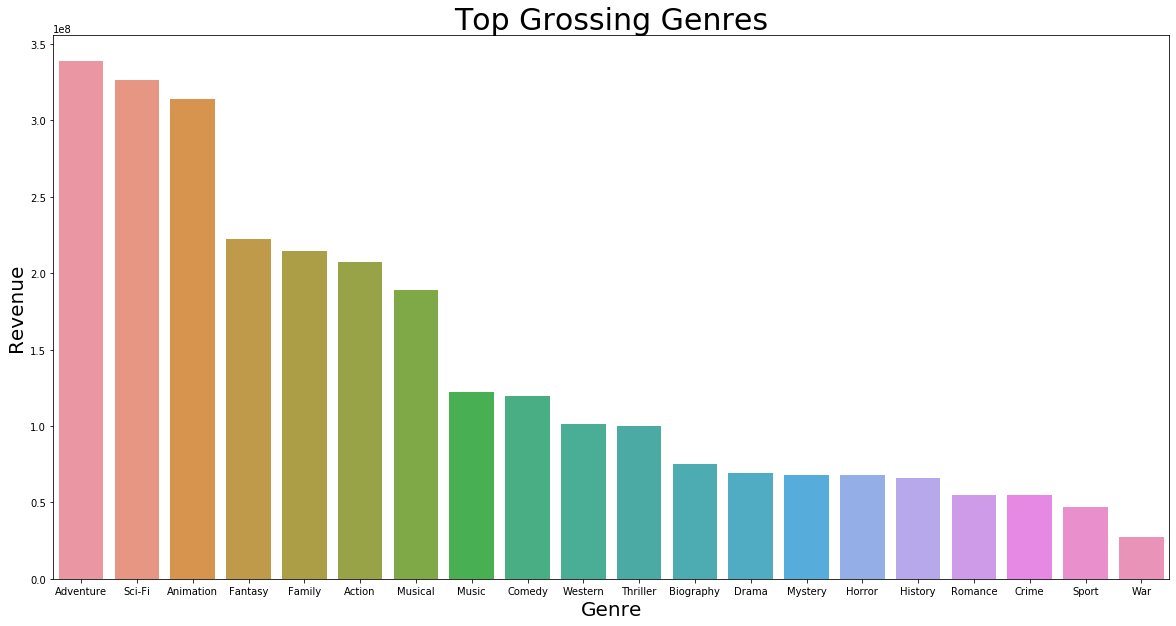

In [36]:
#genre vs revenue bar plot
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(genre_df['genre'], genre_df['revenue_average'])
ax.set_title('Top Grossing Genres', fontsize=(30))
ax.set_ylabel('Revenue', fontsize=(20))
ax.set_xlabel('Genre', fontsize=(20))

Figure 3. Top Grossing Genres

#### What about profit?

It looks like only the top 11 genres make over 100 million. Let's dive into these to see exactly what chunk of that revenue makes up a profit. 

First we make a DataFrame with just the top 11 rows from our `genre_df`.

In [37]:
#grab top genres into df
top_genres_df = genre_df.iloc[:11].copy()
top_genres_df

,genre,count,revenue_average,budget_average
0,Adventure,460,338823701.27,96116025.00
1,Sci-Fi,165,326686013.67,90231589.00
2,Animation,144,313909898.27,81031484.00
3,Fantasy,173,222332205.31,74396411.00
4,Family,107,214217500.11,69715675.00
5,Action,662,207090931.71,66472722.00
6,Musical,13,189202890.31,43201540.00
7,Music,54,122343843.39,26763532.00
8,Comedy,693,119642388.33,36952735.00
9,Western,10,101423712.10,42650000.00


Now, let's add a profits column to our data.

In [38]:
#add profit column to top_genres_df
top_genres_df['average_profit'] = top_genres_df['revenue_average'] - top_genres_df['budget_average']
top_genres_df

,genre,count,revenue_average,budget_average,average_profit
0,Adventure,460,338823701.27,96116025.00,242707676.27
1,Sci-Fi,165,326686013.67,90231589.00,236454424.67
2,Animation,144,313909898.27,81031484.00,232878414.27
3,Fantasy,173,222332205.31,74396411.00,147935794.31
4,Family,107,214217500.11,69715675.00,144501825.11
5,Action,662,207090931.71,66472722.00,140618209.71
6,Musical,13,189202890.31,43201540.00,146001350.31
7,Music,54,122343843.39,26763532.00,95580311.39
8,Comedy,693,119642388.33,36952735.00,82689653.33
9,Western,10,101423712.10,42650000.00,58773712.10


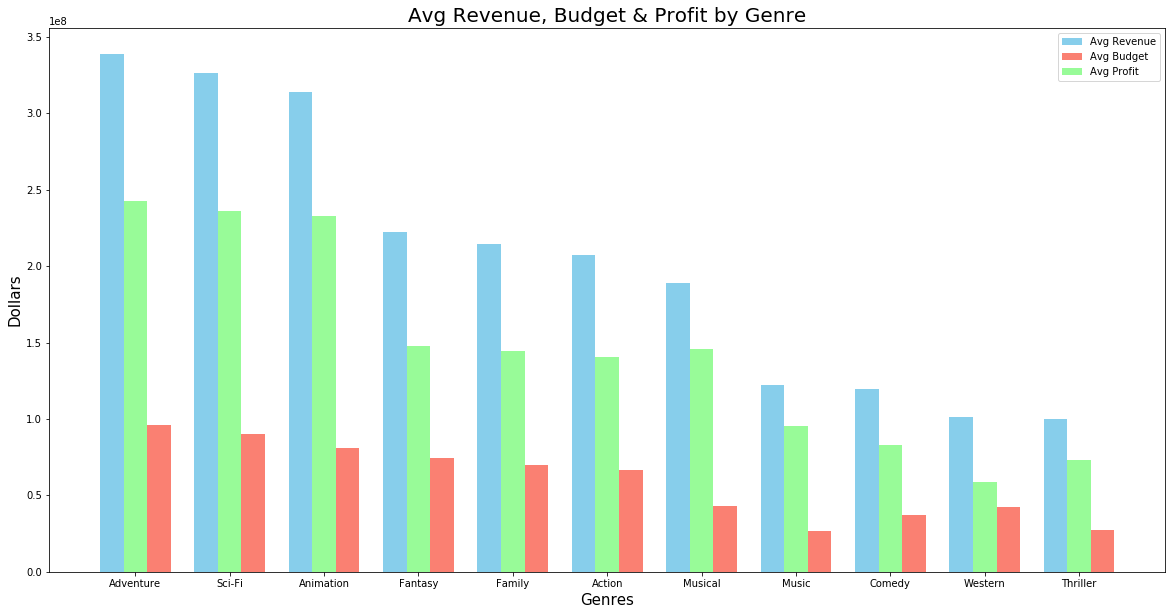

In [40]:
#profit for top genres bar plot
labels = top_genres_df['genre']
revenue = top_genres_df['revenue_average']
budget = top_genres_df['budget_average']
profit = top_genres_df['average_profit']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(20, 10))
bar1 = ax.bar(x + 0.00, revenue, width, label='Avg Revenue', color=('#87CEEB'))
bar2 = ax.bar(x + 0.5, budget, width, label='Avg Budget', color=('#FA8072'))
bar3 = ax.bar(x + 0.25, profit, width, label='Avg Profit', color=('#98FB98'))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Dollars', fontsize=(15))
ax.set_xlabel('Genres', fontsize=(15))
ax.set_title('Avg Revenue, Budget & Profit by Genre', fontsize=(20))
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Figure 4. Avg Revenue, Budget & Profit by Genre

### What group of audiences drives the most sales?

Another way to categorize our data is by MPAA rating. We will limit the ratings we look at to be the most typical. Again, we are using `df_short`.

In [41]:
#cleaning mpaa rating for anything outside of typical ratings
#'Not Rated' removed as this was given for NULL values during cleaning
mpaa_cleaned = df_short[df_short['mpaa_rating'].isin(['PG-13', 'PG', 'R', 'G'])]

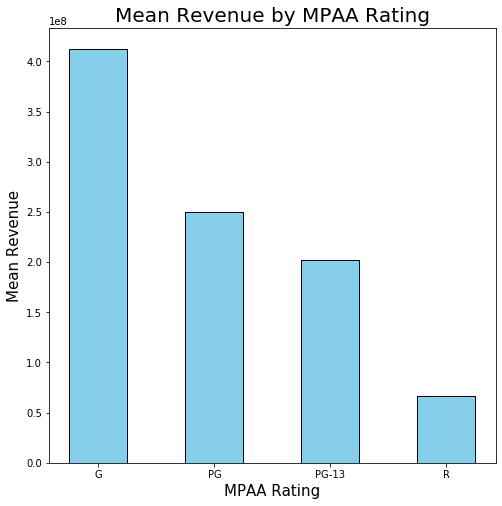

In [47]:
#revenue vs mpaa rating bar plot
labels = ['G', 'PG', 'PG-13', 'R']
mpaa_grouped = mpaa_cleaned.groupby(['mpaa_rating'])
revenue = mpaa_grouped['gross_revenue'].mean().sort_values(ascending=False)

x = np.arange(len(labels))
width = .5

fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(x, revenue, width, color='#87CEEB', edgecolor='black')

ax.set_xlabel('MPAA Rating', fontsize=15)
ax.set_ylabel('Mean Revenue', fontsize=15)
ax.set_title('Mean Revenue by MPAA Rating', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

Figure 5. Mean Revenue by MPAA Rating

### Does movie length affect popularity?

We assume longer movies make for unhappy customers. To find this, we check for correlation using a scatterplot with a regression line.

As this data doesn't require budget or revenue values, we will copy our original DataFrame `df` into a new DataFrame which drops any rows with a NULL value under `star_rating`.

In [48]:
df_star = df.copy()
df_star.dropna(subset=['star_rating'],inplace=True)
df_star

,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
0,tt6751668,Parasite,R,132,"Comedy, Drama, Thriller",8.60,201055038.00,11363000.00
1,tt8946378,Knives Out,PG-13,131,"Comedy, Crime, Drama",8.00,163700000.00,40000000.00
2,tt2584384,Jojo Rabbit,PG-13,108,"Comedy, Drama, War",8.00,82468705.00,14000000.00
3,tt8579674,1917,R,119,"Drama, War",8.40,200483309.00,100000000.00
4,tt8367814,The Gentlemen,R,113,"Action, Comedy, Crime",8.10,48441089.00,18400000.00
...,...,...,...,...,...,...,...,...
9995,tt1533817,Stomp the Yard 2: Homecoming,PG-13,89,"Drama, Music",4.20,0.00,0.00
9996,tt5258904,B&B,TV-MA,87,Thriller,5.30,0.00,1000000.00
9997,tt2585736,American Bistro,TV-MA,94,"Adventure, Comedy, Drama",7.10,0.00,0.00
9998,tt2015315,Poo-reun so-geum,Not Rated,122,"Action, Drama",6.40,0.00,0.00


We see that our data contains some outliers with a handful of movies with a runtime bigger than 6 hours. We drop this below as well as any movies with a 0 minute runtime.

We limited our scope for this graph to only movies less than 25% above the average runtime and greater than 25% below.

In [49]:
indexName = df_star[df_star['runtime']>400].index
df_star.drop(indexName, inplace=True)

indexName = df_star[df_star['runtime']==0].index
df_star.drop(indexName, inplace=True)

run_mean = df_star['runtime'].mean()
run_low = run_mean-(run_mean*0.25)
run_high = run_mean+(run_mean*0.25)

indexName = df_star[(df_star['runtime']>run_high)|(df_star['runtime']<run_low)].index
df_star.drop(indexName, inplace=True)
df_star.head()

,movie_id,movie_title,mpaa_rating,runtime,genre,star_rating,gross_revenue,budget
2,tt2584384,Jojo Rabbit,PG-13,108,"Comedy, Drama, War",8.00,82468705.00,14000000.00
3,tt8579674,1917,R,119,"Drama, War",8.40,200483309.00,100000000.00
4,tt8367814,The Gentlemen,R,113,"Action, Comedy, Crime",8.10,48441089.00,18400000.00
7,tt7286456,Joker,R,122,"Crime, Drama, Thriller",8.60,1073698955.00,55000000.00
9,tt7975244,Jumanji: The Next Level,PG-13,123,"Action, Adventure, Comedy",6.80,310830000.00,125000000.00


Text(0.5, 0, 'Runtime')

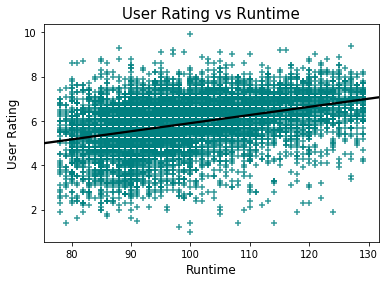

In [50]:
#rating vs runtime scatter plot
fig, ax = plt.subplots()
sns.regplot(df_star['runtime'], df_star['star_rating'], marker="+", scatter_kws={"color": "teal"}, line_kws={"color": "black"})
ax.set_title('User Rating vs Runtime', fontsize=(15))
ax.set_ylabel('User Rating', fontsize=(12))
ax.set_xlabel('Runtime', fontsize=(12))

Figure 6. User Rating vs Runtime